## 트리 알고리즘
- 일반적으로 선형회귀보다 결정트리가 더 성능이 좋음

In [118]:
import pandas as pd

red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')
# 텍스트 중간에 , 가 있는 경우 ;로 구분되어있기도 함
# 구분점이 쉼표가 아니라 ;로 되어있는 경우 sep를 이용하여 구분점 정해주기

In [119]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine['class'] = 0
red_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True) # 컬럼 이름을 변경, 원본 덮어쓰기까지!
# 컬럼명 변경 시 접근은 딕셔너리형태로
# class라는 새로운 컬럼을 생성하고 안을 모두 0으로 채움

red_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [121]:
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine['class'] = 1
white_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True) # 컬럼 이름을 변경, 원본 덮어쓰기까지!
# class라는 새로운 컬럼을 생성하고 안을 모두 0으로 채움

white_wine.head()

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1


In [122]:
wine = pd.concat([red_wine, white_wine]) # 위 아래로 합치기
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


In [123]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [124]:
data = wine[['alcohol','sugar','pH']]
target = wine[['class']]

In [125]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(data, target)

In [126]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [127]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7857142857142857
0.7661538461538462


C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 결정트리
- 데이터 정규화가 필요 없음
- 과대적합을 매개변수 max_depth를 조정하거나, 최소불순도 수치를 조정하여 해결할 수 있음

In [130]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=15)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9854269293924466
0.8566153846153847


In [131]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=15)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.985632183908046
0.8566153846153847


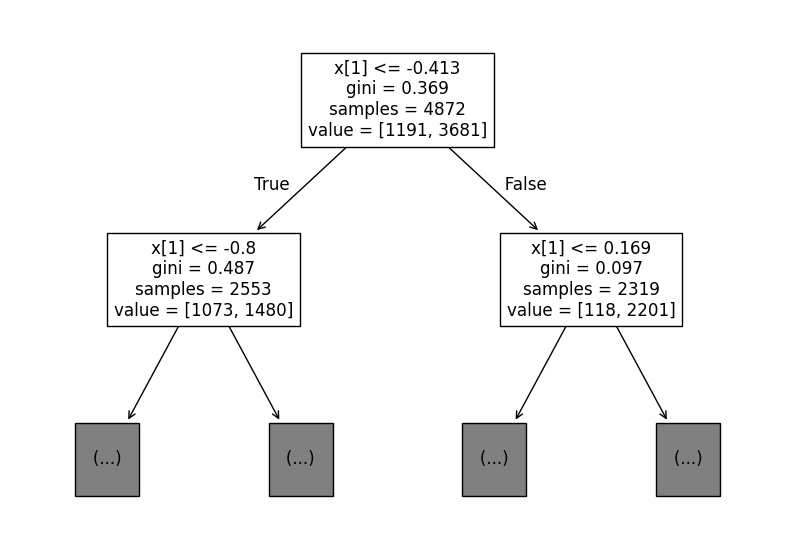

In [136]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7)) # 도화지 크기 설정, figsize는 없어도 무방
# plot_tree(dt)
plot_tree(dt, max_depth=1)
# 앞에 있는 max_depth의 수만큼 트리만 보겠다
plt.show()


# gini = 불순도
# 내가 얼마나 한쪽으로 편향되어있는 데이터를 가지고 있는가에 대한 수치
# 0.5에 가까우면 잘못 나눈 것
# 0에 가까운 건 아주 잘 나눈 것
# 어떻게 나눴을 때 0과 1을 극명하게 나눠줄 수 있는가